### MNIST 숫자 분류 모델 예제: 컨볼루션 신경망(CNN)을 활용한 튜토리얼

본 튜토리얼은 가장 기본적인 딥러닝 데이터셋 중 하나인 MNIST 손글씨 숫자 데이터셋을 사용하여 컨볼루션 신경망(CNN) 모델을 구축하고 학습시키는 과정을 안내합니다. CNN은 이미지와 같은 그리드 형태의 데이터에서 특징을 효과적으로 추출하는 데 뛰어난 성능을 보입니다.

**학습 목표:**

1.  MNIST 데이터셋의 이해 및 전처리 방법 학습
2.  CNN 모델 아키텍처 구성 및 이해
3.  모델 컴파일 및 학습 과정 이해
4.  모델 평가 및 성능 분석
5.  모델 예측 결과 시각화
6.  모델 튜닝 및 하이퍼파라미터 최적화의 기본 개념 이해 및 예시 적용

이 튜토리얼은 딥러닝 및 이미지 분류에 대한 기본적인 이해를 돕기 위해 구성되었습니다.

### 데이터 로드 및 전처리 (Data Loading and Preprocessing)

신경망 모델 학습을 위해 데이터를 준비하는 과정입니다. MNIST 데이터셋을 불러오고, CNN 모델의 입력 형태에 맞게 변환하며, 학습 효율을 높이기 위해 정규화 작업을 수행합니다.

**주요 단계:**

1.  **MNIST 데이터셋 로드:** `tensorflow.keras.datasets.mnist`에서 훈련 및 테스트 데이터셋을 불러옵니다.
2.  **이미지 형태 변환 (Reshaping):** `Conv2D` 레이어는 채널 차원을 요구하므로, 흑백 이미지인 MNIST 데이터를 (높이, 너비, 1) 형태로 변환합니다.
3.  **픽셀 값 정규화 (Normalization):** 픽셀 값을 0-255 범위에서 0-1 범위로 스케일링합니다.
4.  **레이블 원-핫 인코딩 (One-Hot Encoding):** 다중 클래스 분류를 위해 레이블을 원-핫 인코딩 벡터로 변환합니다.

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# MNIST 데이터셋 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 전처리

# 이미지 형태 변환: (높이, 너비) -> (높이, 너비, 채널)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 픽셀 값 정규화: 0-255 -> 0-1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# 레이블 원-핫 인코딩: 정수 레이블 -> 원-핫 벡터
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


### 모델 구축 및 컴파일 (Model Building and Compilation)

MNIST 숫자 이미지 분류를 위한 CNN 모델을 정의하고 학습 준비를 마치는 과정입니다.

**모델 구조:**

-   **Sequential:** 레이어를 순차적으로 쌓는 모델 구성 방식
-   **Conv2D:** 이미지에서 특징을 추출하는 컨볼루션 레이어
    -   `filters`: 필터 수
    -   `kernel_size`: 필터 크기
    -   `activation='relu'`: 비선형 활성화 함수 ReLU 사용
    -   `input_shape`: 입력 데이터 형태 (첫 레이어에만 지정)
-   **MaxPooling2D:** 특징 맵의 크기를 줄이는 풀링 레이어
    -   `pool_size`: 풀링 윈도우 크기
-   **Flatten:** 다차원 특징 맵을 1차원 벡터로 변환
-   **Dense:** 완전 연결 레이어
    -   `units`: 뉴런(유닛) 수
    -   `activation='relu'`: ReLU 활성화 함수 사용
-   **Dropout:** 학습 중 일부 뉴런을 비활성화하여 과적합 방지
    -   비율: 비활성화할 뉴런의 비율
-   **Dense (Output Layer):** 최종 출력 레이어
    -   `units=10`: 10개 클래스(0-9)에 대한 출력
    -   `activation='softmax'`: 각 클래스에 대한 확률 분포 출력

**모델 컴파일:**

-   **loss='categorical_crossentropy'**: 다중 클래스 분류에 적합한 손실 함수
-   **optimizer='adam'**: 효율적인 최적화 알고리즘 Adam 사용
-   **metrics=['accuracy']**: 성능 측정 지표로 정확도 사용

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN 모델 구축
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), # 과적합 방지를 위한 Dropout 추가
    Dense(10, activation='softmax') # 10개 클래스 분류를 위한 출력 레이어
])

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 구조 요약 출력
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### 모델 학습 (Model Training)

준비된 훈련 데이터셋을 사용하여 모델을 학습시키는 과정입니다. 모델은 손실 함수를 최소화하고 정확도를 최대화하도록 내부 파라미터(가중치, 편향)를 조정합니다.

**학습 설정:**

-   **`model.fit()`:** 모델 학습 함수
-   `X_train`, `y_train`: 훈련 데이터 및 레이블
-   `batch_size`: 한 번의 가중치 업데이트에 사용되는 샘플 수
-   `epochs`: 전체 훈련 데이터셋을 반복할 횟수
-   `verbose=1`: 학습 진행 상황 출력 설정
-   `validation_data=(X_test, y_test)`: 각 에포크 종료 후 검증 데이터로 성능 평가 (과적합 모니터링)

**Early Stopping 적용:**

모델 튜닝의 한 예시로 Early Stopping(조기 종료) 콜백 함수를 사용합니다. 이는 검증 데이터의 성능이 일정 기간 동안 개선되지 않으면 학습을 자동으로 중단하여 과적합을 방지하고 불필요한 학습 시간을 줄여줍니다.

-   `monitor='val_loss'`: 검증 손실을 모니터링 지표로 사용
-   `patience=3`: 검증 손실이 3 에포크 동안 개선되지 않으면 학습 중단
-   `restore_best_weights=True`: 학습 중 검증 손실이 가장 낮았던 시점의 모델 가중치로 복원

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

# Early Stopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 학습 매개변수 설정
batch_size = 128
epochs = 10 # Early Stopping이 적용되므로 충분히 큰 값으로 설정 가능

# 모델 학습 (Early Stopping 적용)
print("Starting model training with Early Stopping...")
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, # 학습 진행 상황 출력
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping]) # Early Stopping 콜백 적용

print("Model training finished.")

Starting model training with Early Stopping...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 107ms/step - accuracy: 0.8039 - loss: 0.6220 - val_accuracy: 0.9806 - val_loss: 0.0619
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 102ms/step - accuracy: 0.9695 - loss: 0.1035 - val_accuracy: 0.9868 - val_loss: 0.0414
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 105ms/step - accuracy: 0.9780 - loss: 0.0750 - val_accuracy: 0.9891 - val_loss: 0.0330
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - accuracy: 0.9820 - loss: 0.0583 - val_accuracy: 0.9884 - val_loss: 0.0347
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - accuracy: 0.9853 - loss: 0.0501 - val_accuracy: 0.9907 - val_loss: 0.0289
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - accuracy: 0.9864 - loss: 0.0438 - val_accuracy: 0.9915 - val_loss: 0.0255
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 107ms/step - accuracy: 0.9889 - loss: 0.0365 - val_accuracy: 0.9918 - val_loss: 0.0262
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━

### 모델 평가 (Model Evaluation)

학습이 완료된 모델이 아직 보지 못한 테스트 데이터셋에 대해 얼마나 잘 작동하는지 최종 성능을 평가합니다.

**평가 과정:**

-   **`model.evaluate()`:** 모델 성능 평가 함수
-   `X_test`, `y_test`: 테스트 데이터 및 레이블
-   `verbose=0`: 평가 과정 출력 없이 결과만 반환

**평가 결과:**

-   Test loss: 테스트 데이터셋에 대한 최종 손실 값. 낮을수록 좋습니다.
-   Test accuracy: 테스트 데이터셋에 대한 최종 정확도. 모델이 올바르게 분류한 비율입니다. 높을수록 좋습니다.

In [6]:
# 모델 평가
print("Evaluating the model...")
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Model evaluation finished.")

Evaluating the model...
Test loss: 0.02546335570514202
Test accuracy: 0.9915000200271606
Model evaluation finished.


### 모델 예측 결과 시각화 (Visualize Model Predictions)

학습된 모델을 사용하여 몇 가지 테스트 이미지에 대한 예측을 수행하고, 실제 레이블과 모델의 예측 결과를 비교하여 시각적으로 확인합니다.

**시각화 과정:**

1.  테스트 데이터셋에서 샘플 이미지 선택
2.  선택된 이미지에 대한 모델 예측 수행
3.  실제 레이블과 예측된 레이블 가져오기
4.  Matplotlib을 사용하여 이미지와 함께 실제/예측 레이블 표시

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


/tmp/ipython-input-369968585.py:22: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-369968585.py:22: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-369968585.py:22: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-369968585.py:22: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packa

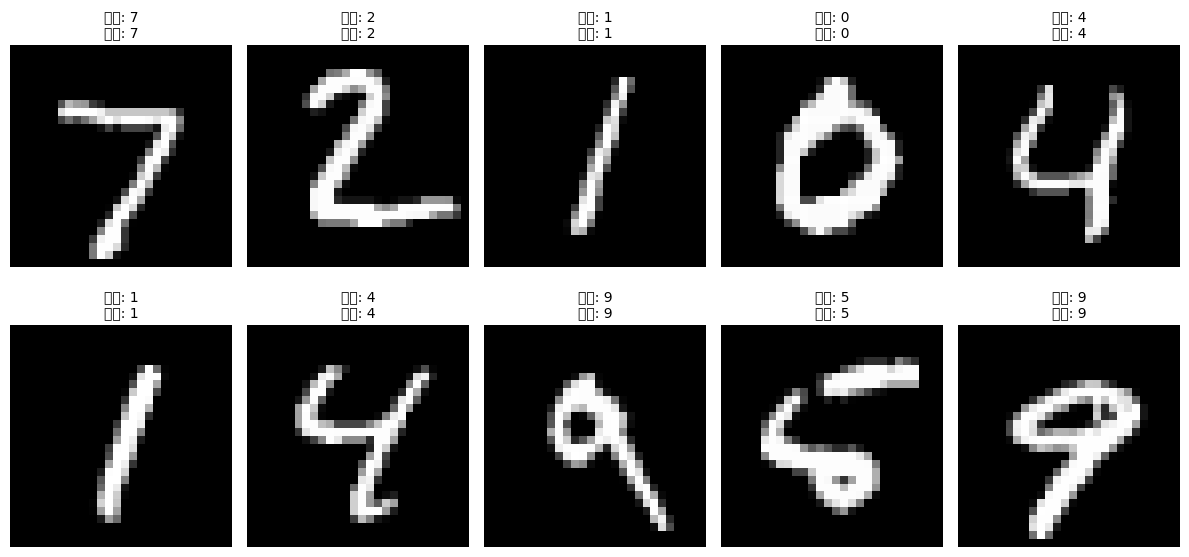

In [7]:
import matplotlib.pyplot as plt

# 시각화를 위한 샘플 이미지 인덱스 선택 (각 숫자별로 하나씩)
sample_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# 샘플 이미지와 실제 레이블 가져오기
sample_images = X_test[sample_indices]
sample_true_labels = np.argmax(y_test[sample_indices], axis=1)

# 모델 예측 수행
sample_predictions = model.predict(sample_images)
sample_predicted_labels = np.argmax(sample_predictions, axis=1)

# 이미지와 예측 결과 시각화
plt.figure(figsize=(12, 6))
for i in range(len(sample_indices)):
    plt.subplot(2, 5, i + 1) # 2행 5열 격자
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"실제: {sample_true_labels[i]}\n예측: {sample_predicted_labels[i]}", fontsize=10)
    plt.axis('off') # 축 숨기기

plt.tight_layout()
plt.show()

### 모델 튜닝 및 하이퍼파라미터 최적화 (Model Tuning and Hyperparameter Optimization)

모델의 성능을 더욱 향상시키기 위해 하이퍼파라미터를 조정하는 과정입니다. 하이퍼파라미터는 모델 학습 전에 설정하는 값들로, 학습 과정에 큰 영향을 미칩니다.

**하이퍼파라미터 예시:**

-   **에포크 수 (Epochs):** 전체 데이터셋 학습 반복 횟수
-   **배치 크기 (Batch Size):** 한 번에 처리하는 샘플 수
-   **학습률 (Learning Rate):** 가중치 업데이트 보폭
-   **드롭아웃 비율 (Dropout Rate):** 드롭아웃 레이어에서 비활성화할 뉴런 비율
-   **Conv2D 필터 수:** 컨볼루션 레이어의 특징 감지 필터 개수
-   **Dense 레이어 뉴런 수:** 완전 연결 레이어의 뉴런 개수

**튜닝 방법:**

다양한 하이퍼파라미터 조합을 시도하고 검증 데이터셋으로 성능을 평가하여 최적의 조합을 찾습니다. 그리드 탐색, 랜덤 탐색, 베이지안 최적화 등 다양한 기법이 사용될 수 있습니다.

본 튜토리얼에서는 Early Stopping을 통해 에포크 수를 자동으로 조절하는 간단한 튜닝 예시를 보여주었습니다. 실제로는 다양한 하이퍼파라미터를 변경해가며 실험하여 더 나은 성능을 얻을 수 있습니다.

(참고: 여기서는 추가적인 복잡한 하이퍼파라미터 튜닝 코드를 포함하지는 않지만, 개념 이해를 돕기 위한 설명입니다.)

**Reasoning**:
The previous command failed because the `model` variable was not defined in the current scope. I need to rebuild the model before retraining it with the EarlyStopping callback.



In [ ]:
# Build the CNN model again as it was lost
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model again
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Retrain the model with Early Stopping
print("Starting model retraining with Early Stopping...")
history_tuned = model.fit(X_train, y_train,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(X_test, y_test),
                          callbacks=[early_stopping])

print("Model retraining finished.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting model retraining with Early Stopping...
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 88ms/step - accuracy: 0.8150 - loss: 0.5942 - val_accuracy: 0.9797 - val_loss: 0.0594
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9672 - loss: 0.1085 - val_accuracy: 0.9853 - val_loss: 0.0439
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - accuracy: 0.9782 - loss: 0.0719 - val_accuracy: 0.9868 - val_loss: 0.0359
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 84ms/step - accuracy: 0.9818 - loss: 0.0618 - val_accuracy: 0.9891 - val_loss: 0.0314
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9851 - loss: 0.0493 - val_accuracy: 0.9907 - val_loss: 0.0268
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9871 - loss: 0.0428 - val_accuracy: 0.9918 - val_loss: 0.0252
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.9893 - loss: 0.0363 - val_accuracy: 0.9913 - val_loss: 0.0253
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4

In [2]:
# 모델 평가
print("Evaluating the model...")
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Model evaluation finished.")

Evaluating the model...


NameError: name 'model' is not defined

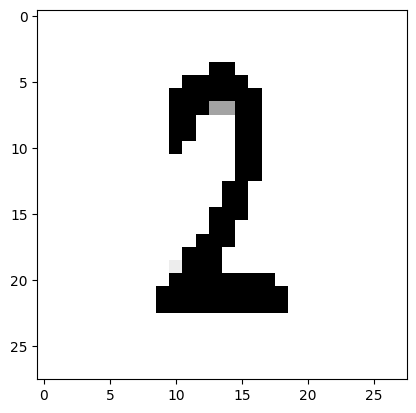

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
테스트 데이터를 예측하여 각 클래스별 확률 분포(softmax 결과): [[2.8707643e-09 8.4245447e-03 9.9157494e-01 4.7328665e-08 4.1748247e-10
  2.0425002e-11 1.9286381e-09 2.9639241e-07 8.9380990e-08 2.0078046e-09]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
확률 분포에서 가장 큰 값의 인덱스 (예측 클래스): [2]
정답 라벨: [2]


In [9]:
### 손글씨 이미지
import cv2
import numpy as np # numpy as np로 수정
import matplotlib.pyplot as plt

# 1) 흑백으로 불러오기
img = cv2.imread("2.png", cv2.IMREAD_GRAYSCALE)
#/content/1.png
### 정답 라벨 추가
y_custom = np.array([2])  # 정답 라벨

# 2) MNIST 형식 맞추기: 28x28
img = cv2.resize(img, (28,28))

plt.imshow(img, cmap='gray') # 이미지 표시 코드 수정 및 컬러맵 설정
plt.show() # 이미지 표시를 위해 show() 추가

# 3) 흰색 배경, 검은색 숫자로 맞추기
img = 255 - img   # 배경/글씨색 반전이 필요할 수 있음

# 4) [0,1] 정규화 + 채널 차원 추가
img = img.astype("float32") / 255.0
img = np.expand_dims(img, axis=-1)  # (28,28,1)

# 5) 배치 차원 추가
x_custom = np.expand_dims(img, axis=0)  # (1,28,28,1)

print(f"테스트 데이터를 예측하여 각 클래스별 확률 분포(softmax 결과): {model.predict(x_custom)}")
print(f"확률 분포에서 가장 큰 값의 인덱스 (예측 클래스): {model.predict(x_custom).argmax(axis=1)}")
print(f"정답 라벨: {y_custom}")